### Visualização dos problemas de Programação Linear

$z= 3x_{1}+3x_{2}\rightarrow \max \quad$

$x_{1} + 2x_{2} \leq 7 \quad$ 

$2x_{1}+ x_{2} \leq 8\quad$ 

$x_{2} \leq 3\quad$ 

$x_{1},x_{2}\geq 0\quad$

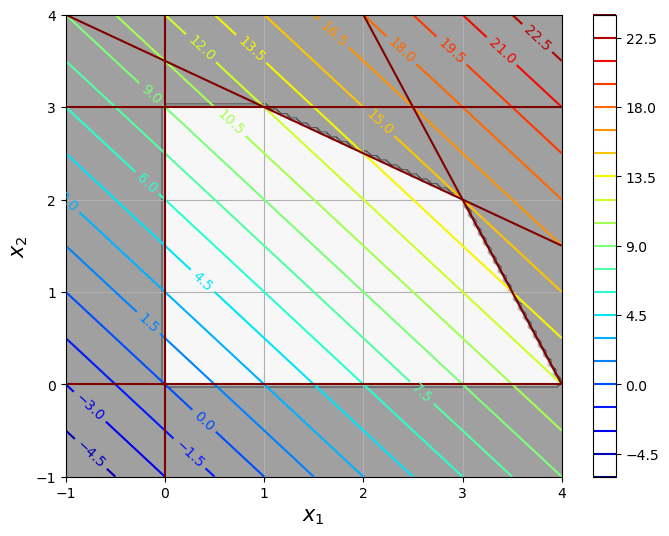

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Função objetivo:
def  f(x1, x2): return 3*x1 + 3*x2

# Restrições na forma h(x1,x2) <= 0:
def h1(x1, x2): return x1 + 2*x2 - 7
def h2(x1, x2): return 2*x1 + x2 - 8
def h3(x1, x2): return x2 - 3
def h4(x1, x2): return -x1
def h5(x1, x2): return -x2
LH = [h1,h2,h3,h4,h5]    # lista das restrições

def hh(x1, x2):
    for h in LH:
        if h(x1, x2) > 0: return 1  # restrição violada
    return  0  # nenhuma restrição violada
hhv = np.vectorize(hh)

xmin, xmax = -1, 4
ymin, ymax = -1, 4

xx = np.linspace(xmin, xmax, 100)
yy = np.linspace(ymin, ymax, 100)
X,Y = np.meshgrid(xx,yy)

fig = plt.figure(figsize=(8,6))
cs = plt.contour(X,Y, f(X,Y), 25, cmap='jet')
plt.colorbar(cs)
plt.clabel(cs, fontsize=10)

plt.contourf(X,Y, hhv(X,Y), cmap='binary',  alpha=0.4)

for h in LH: 
    plt.contour(X,Y, h(X,Y), [0], colors='maroon')
    
plt.xlabel(r"$x_1$", fontsize=15)
plt.ylabel(r"$x_2$", fontsize=15)
plt.grid()

#plt.savefig("LP.pdf")

plt.show()

# =================================

# Introdução aos métodos numéricos

### Limitações de Matemática clássica

**Exemplo 1** 

Resolver a equação    $\qquad \sin(x) + \ln(x) = 2$

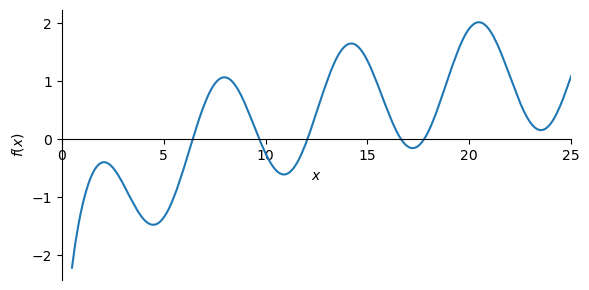

NotImplementedError: multiple generators [log(x), sin(x)]
No algorithms are implemented to solve equation log(x) + sin(x) - 2

In [3]:
import sympy as sp
sp.init_printing()
sp.var('x')

g = sp.sin(x) + sp.log(x) - 2

sp.plot(g, (x, 0.5, 25), axis_center=(0,0), xlim=(0,25),size=(6,3))

sp.solve(g,x)

**Exemplo 2** 

Calcular  $\displaystyle \quad \int_1^2 \frac{e^x}{x}dx$

In [ ]:
sp.integrate(sp.exp(x)/x, (x,1,2))

**********************
## Métodos iterativos:

$f(x)=0$ - *equação não linear*

$x^{\ast}$ - *solução exata*

$x_{0}$  - *estimativa inicial da solução*  

$x_{0}\rightarrow x_{1}\rightarrow x_{2}\rightarrow x_{3}\rightarrow
x_{4}\rightarrow ....\rightarrow x^{\ast}$

$x_{k+1}=F(x_{k})$   -    *fórmula de iteração*

*Critério de paragem:*   
$\displaystyle \frac{\vert x_{k+1}-x_{k}\vert}{\vert x_{k}\vert} \leq \varepsilon $

$\displaystyle \vert x_{k+1}-x_{k} \vert \leq \varepsilon \vert x_{k}\vert$

$\varepsilon$= valor conhecido (<<1)  -  *tolerância   (erro relativo)*

### Método de Newton para  resolver as equações não lineares
Equação não-linear:  $\quad f(x)=0$

Fórmula de iteração:  $\displaystyle \quad x_{k+1} = x_{k} - \frac{f(x_{k})} {f^{\prime}(x_{k})}$

**Dedução**:
$$\displaystyle f(x) \approx f(x_{0}) + f^{\prime}(x_{0})(x-x_{0})$$   

$$\displaystyle  0 = f(x_{0}) + f^{\prime}(x_{0})(x-x_{0})$$

$$\displaystyle  x-x_{0} = - \frac{f(x_{0})}{f^{\prime}(x_{0})}$$

$$\displaystyle  x_{1} = x_{0} - \frac{f(x_{0})}{f^{\prime}(x_{0})}$$

$$\displaystyle  x_{k+1} = x_{k} - \frac{f(x_{k})}{f^{\prime}(x_{k})}$$


**Exemplo das iterações convergentes:**
![](http://home.uevora.pt/~bushen/LabMat/A3-newton-calc.png)

**Ilustração geométrica do método de Newton**

![](http://home.uevora.pt/~bushen/LabMat/A3-newton1.png)

**Exemplo das iterações divergentes**
<img src="http://home.uevora.pt/~bushen/LabMat/A3-newton2-diverg.png" title="Campo grav" width="500" height="400" />

#### Método de Newton para calcular os extremos (min, max) de funções
Condição necessária do extremo:  $\quad f^{\prime}(x)=0$

Fórmula de iteração:
$$\displaystyle \quad x_{k+1} = x_{k} - \frac{f^{\prime}(x_{k})}{f^{\prime\prime}(x_{k})}$$

#### Método da bissecção
Pretende-se resolver a equação:  $f(x)=0$ 

$f(x)$ - contínua no intervalo $[a,b]$, e verifica-se a condição   $\quad f(a)f(b) < 0$

A existência da raíz de $f(x)=0$  é garantida pelo Teorema de Weierstrass. 

**Ilustração geométrica do método da bissecção**
![](http://home.uevora.pt/~bushen/LabMat/A3-Bisseccao.png)

**Mais detalhas sobre os métodos numéricos para resolver as equações não lineares:**
> J. Kiusalaas. Numerical Methods in Engineering with Python3

# ==============================

# Bibliotecas Scipy


***Scipy*** é uma biblioteca Python criada com vista à aplicação de algoritmos que dão resposta a estas e outras questões. Nesta bibiloteca existem algoritmos para otimização, integração, interpolação, problemas de valor próprio, equações algébricas, equações diferenciais, estatísticas e muitos outros tipos de problemas.

Esta biblioteca fornece ferramentas adicionais à biblioteca **Numpy** para operações com matrizes, fornecendo estruturas de dados especializadas, como matrizes esparsas.

Todas as informações sobre a biblioteca podem ser acedidas no site

https://scipy.org/

O **Scipy** é composto por vários submódulos dedicados a tarefas específicas do cálculo computacional científico. Todos eles operam de forma eficiente utilizando o NumPy.

Podemos aceder ao módulos desta biblioteca no site https://docs.scipy.org/doc/scipy/reference/  ou através do **dir** aplicado à biblioteca, depois de fazermos a devida importação biblioteca **scipy**, que pode ser realizado através de um  dos comandos seguintes: 

`import scipy`

`import scipy as sc`

Aqui temos alguns dos submódulos do Scipy

![SciPy](http://home.uevora.pt/~bushen/LabMat/Scipy-info.png)

A importação deste pacote para qualquer código Python requer a importação do numpy.

Podemos importar um módulo específico através do comando 

`from scipy import <submodulo>`

nunca esquecendo que necessitamos de 

`import numpy as np`

Aceda ao site https://docs.scipy.org/doc/scipy/reference/?v=20210324000006 para mais informação.

Pode ainda aceder à informação nos sites

https://docs.scipy.org/doc/


Para visão geral da funcionalidade do SciPy, consulte https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

Para obter uma lista exaustiva de tudo o que é possível com o SciPy, consulte https://docs.scipy.org/doc/scipy/reference/index.html#scipy-api.

Existem vários *tutoriais* do **Scipy**, como por exemplo https://www.tau.ac.il/~kineret/amit/scipy_tutorial/#x1-210004.4 

**********************************

In [ ]:
import scipy
print(scipy.__version__)

### scipy.linalg    (Algebra Linear)  

[scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html)

Não confundir com    
[numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [ ]:
import numpy as np
from scipy import linalg as la
#from numpy import linalg as la

# linalg usa os "arrays" do numpy
A = np.array([[1,3,5], [2,5,1], [2,3,8]]) 
display(A)
b = np.array([6,7,8]) 
display(b)


In [ ]:
B = la.inv(A)   # cálculo da inversa
B

In [ ]:
P = A@B   # Atenção para os erros de arredondamento !
P

In [ ]:
la.det(A)  # determinante

In [ ]:
# Uma função para imprimir os arrays 
def pr_array(A):
    
    # isinstance - built-in function
    # Devolve um booleano que indica se um objeto pertence a uma 
    # classe ou a uma subclasse da classe
    
    if not isinstance(A,np.ndarray): 
        print('No ndarray')
        return
    
    nd = A.ndim          # número de dimensões
    if nd==1:
        n, = A.shape     # par ordenado com o números de linhas e colunas 
        for i in range(n):
            print("%10.6f "%(A[i]), end="")  # end="" - para continuar imprimir na mesma linha
        print(" ")
    elif nd==2:
        m,n = A.shape    # números das linhas e colunas 
        for i in range(m):
            for j in range(n):
                print("%10.6f "%(A[i,j]), end="")
            print(" ")
    print('')
        
pr_array(P)
pr_array(b)
print(P)      # para comparar
print(b)      # para comparar  
pr_array(A@B)

In [ ]:
2, 

**Normas de vetores e matrizes**

Norma vetorial
$\displaystyle \quad  \|x\|_{1}=\sum _{i=1}^{n}|x_{i}|$.

Norma matricial
$\displaystyle \quad  \|A\|_{1}=\max \limits _{1\leq j\leq n}\sum _{i=1}^{m}|a_{ij}|$,

Norma vetorial
$\displaystyle \quad  \|x\|_{\infty }=\max \limits _{1\leq i\leq n}|x_{i}|$.

Norma matricial 
$\displaystyle \quad  \|A\|_{\infty }=\max \limits _{1\leq i\leq m}\sum _{j=1}^{n}|a_{ij}|$,

Norma vetorial 
$\displaystyle \quad  \|x\|_{2}=\sqrt {\sum _{i=1}^{n}x_{i}^{2}}$.

Norma de Frobenius
$\displaystyle \quad \|A\|_F = \sqrt { \sum_{i,j} x_{i,j}^{2} }$

Norma matricial espectral
$\displaystyle \quad  \|A\|_{2}=\sup \limits _{\|x\|_{2}=1}\|Ax\|_{2}=\sup \limits _{(x,x)=1}{\sqrt {(Ax,Ax)}}={\sqrt {\lambda _{max}(A^{*}A)}}$,


In [ ]:
pr_array(A)
pr_array(b)

display(la.norm(A))  
la.norm(A,'fro')   # norma de Frobenius 

In [ ]:
display(la.norm(b))
la.norm(b, 2)      # norma euclidiana

In [ ]:
display(la.norm(A, 1))    
la.norm(b, 1)    

In [ ]:
la.norm(A, np.inf)
la.norm(b, np.inf)

In [ ]:
la.eig(A)  # valores e vetores próprios

In [ ]:
res = la.eigvals(A)  # valores próprios
display(res)
pr_array(res)

***********************************

### Resolução dos sistemas lineares

In [ ]:
import numpy as np
from scipy import linalg as la

A = np.array([[1, 2], [3, 4]])
pr_array(A)

In [ ]:
b = np.array([[5], [6]])
pr_array(b)

In [ ]:
x = la.inv(A)@b      # resolução pela inversão da matriz A
pr_array(x)

In [ ]:
# Verificação da resposta:
display(A@x - b)
pr_array(A@x - b)

In [ ]:
res = la.solve(A, b)    # resolução aplicando solver
pr_array(res)

#### Tempo de cálculos

In [ ]:
%%timeit
la.solve(A, b)

In [ ]:
%%timeit
la.inv(A)@b

In [4]:
import sympy as sp
sp.var('x1, x2')
eqs = [x1 + 2*x2 -5, 3*x1 + 4*x2-6]
eqs
sp.solve(eqs)

In [5]:
%%timeit
sp.solve(eqs)

925 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


A resolução numérica de equações pode ser também realizada a partir de métodos de optimização.

Considere uma equação da forma $f(x)=0$. É evidente que $f(x)=0$ sse $f(x)f(x)=0$. 

Ora, os pontos $z$ que verificam a equação equivalente $f^2(z)=0$ são, também, os pontos de mínimo absoluto da função $f^2$, que é não negativa. 

Vejamos o exemplo:

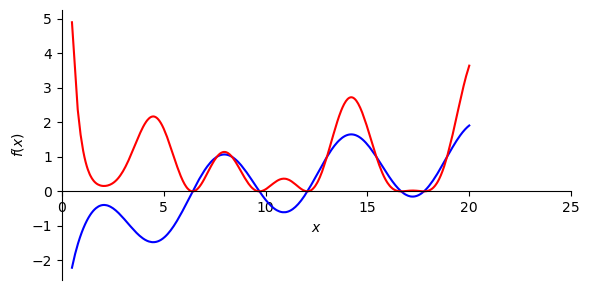

In [6]:
import sympy as sp
from sympy.plotting import plot

sp.init_printing()
sp.var('x')

g = sp.sin(x) + sp.log(x) - 2
g2 = g*g

p1 = sp.plot(g, (x, 0.5, 20), axis_center=(0,0), xlim=(0,25),size=(6,3), show=False,line_color='blue')
p2 = sp.plot(g2, (x, 0.5, 20), axis_center=(0,0), xlim=(0,25),size=(6,3),show=False,line_color='red')
p1.extend(p2)
p1.show()


Ou seja, se existirem, os zeros de $f$ são os pontos de mínimo absoluto de $f^2$. 

### ----------------------------------------------------------------
## scipy.optimize   (Otimização)

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

#### Minimização de função de uma variável

`minimize_scalar(fun, bounds=None, args=(), method='brent', tol=None, options=None)`

`fun` - função a minimizar

`bounds` - intervalo admissível

`method` - método utilizado (`brent`, `golden`, `bounded`)

`tol` - tolerância (precisão do resultado)

`options`- parâmetros ({maxiter=500,...} - número máximo das iterações, etc) 

https://docs.scipy.org/doc/scipy/tutorial/optimize.html#unconstrained-minimization-method-brent

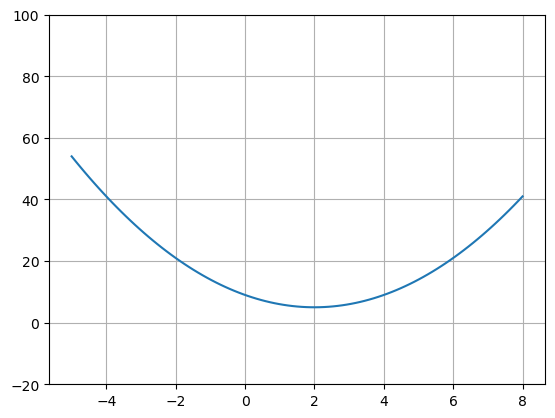

In [7]:
import matplotlib.pyplot as plt

def fun1(x):
    return (x - 2)**2 + 5

def fun2(x):
    return (x - 2)*x*(x + 2)**2

xx = np.linspace(-5,8, 101)
yy = fun1(xx)

fig = plt.figure() 
plt.plot(xx, yy)
plt.grid()
plt.ylim(-20, 100)
plt.show()

### Método de Brent

<!-- &nbsp; - um espaço; &ensp; - 2 espaços, &emsp; - 4 espaços -->

O método de Brent é um método misto que combina as abordagens de enquadramento e busca **(método da bissecção, método da secante, método da interpolação quadrática inversa)**.

* Dados 3 pontos ordenados $a<c<b$ tais que $f(a)>f(c)<f(b)$ e que o minimizante da função $f$ sem constrangimentos pertence ao intervalo $[a,b]$ aplica-se *método da interpolação quadrática inversa*


* Alternativamente, dados dois pontos $a$ e $b$, o terceiro ponto será encontrado a partir dos pontos dados usando um algoritmo de marcha simples *método da bissecção ou secante*. 
 
Duas desigualdades devem ser satisfeitas simultaneamente:

Dada uma tolerância numérica específica $\delta$, se na iteração anterior usou: 
* o **método da bissecção**, a desigualdade  $|\delta |<|b_{k}-b_{k-1}|$ deve manter-se para realizar a **interpolação**, 

&emsp;  caso contrário 

&emsp; &emsp; o **método da bissecção** é executado e seu resultado usado na iteração seguinte.

* a **interpolação**, a desigualdade $|\delta |<|b_{k-1}-b_{k-2}|$ é usado para executar a próxima iteração:
    - **interpolação** (quando a desigualdade é verdadeira) 
    
    ou 
    
    - **método de bisseção** (quando a desigualdade não é verdadeira).

Além disso, se na iteração anterior usou 
 * o **método da bissecção**, a desigualdade $|s-b_{k}|<\frac {1}{2}|b_{ k}-b_{k-1}|$ deve ser mantida. 
 
&emsp; Caso contrário, 


&emsp;&emsp; o **método de bissecção** é executado e seu resultado usado para na iteração seguinte. 

 * **interpolação**, então a desigualdade $|s-b_{k}|< \frac {1}{2}|b_{k-1 }-b_{k-2}|$ é usado em vez disso.


Brent provou que seu método requer no máximo $N^2$ iterações, onde $N$ denota o número de iterações para o método da bissecção. Se a função $f$ for bem comportada, então o método de Brent normalmente procederá por interpolação quadrática inversa ou interpolação linear, caso em que convergirá superlinearmente.

**Nota**
> Caso não sejam dados pelo menos 2 pontos iniciais então considera-se os pontos 0 e 1 (esta pode não ser a escolha certa para a função e resultar no cálculo de um mínimo inesperado).


In [8]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(fun1, method='brent')
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 5.0
       x: 2.0
     nit: 4
    nfev: 8

In [9]:
#from scipy.optimize import minimize_scalar

res = minimize_scalar(fun1, bounds=[-4,0], method='bounded', options={'maxiter':100})
res

 message: Solution found.
 success: True
  status: 0
     fun: 9.000022514726037
       x: -5.628673589008228e-06
     nit: 28
    nfev: 28

De forma semelhante, no caso de funções com várias variáveis,  obtemos:

$$F(x)= 0 \Leftrightarrow \Vert F(x)\Vert^2=0 \Leftrightarrow F(x)\cdot F(x)=0$$

Se existirem, as soluções de $F(x)=0$ são os pontos de mínimo absoluto de $f(x)= F(x)\cdot F(x).$

#### Minimização de função de várias variáveis

`minimize(fun, x0, method=None, constraints=(), tol=None, 
    jac=None, hess=None, hessp=None, bounds=None, options=None)`

`fun` - função a minimizar

`x0`  - ponto inicial

`method` - método utilizado (`CG`,`Nelder-Mead`, `SLSQP`, etc)

https://docs.scipy.org/doc/scipy/tutorial/optimize.html#


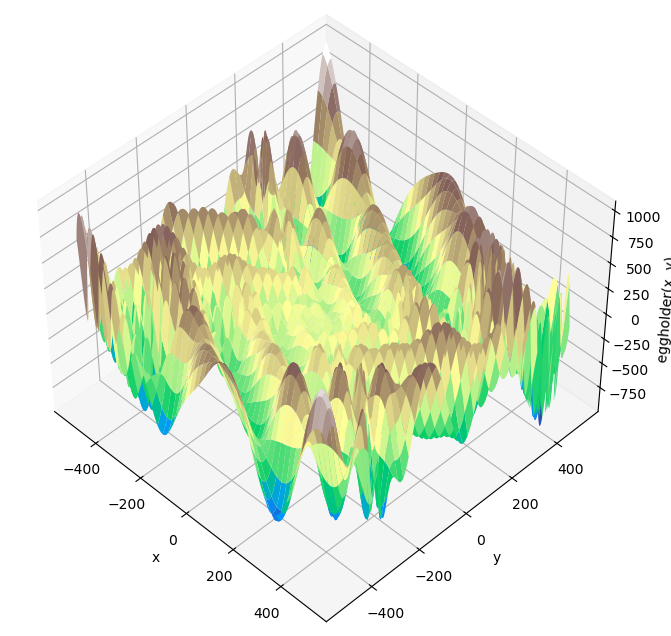

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

#bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

### Método dos Gradientes Conjugados(red)

Queremos minimizar $F(X)$, com $X\in D_F\subset\mathbb{R}^N$. Suponhamos que $\nabla F(X)$ = AX-b, tal que $A$ é uma matriz definida positiva. 

Existe um produto interno associado a essa matriz (pois é definida positiva) definido por

$$(u,v)_A = u^TAv.$$

Se os vectores $u$ e $v$ são ortogonais relativamente a este produto interno, dizemos que $u$ e $v$ têm direcções conjugadas.

Podemos definir direcções que são conjugadas ao vector gradiente $$ u = -\nabla f(x)= b-Ax$$

$$0=(u,\nabla f(x))_A = (b-AX,AX-b)_A = -(AX-b,AX-b)=-\Vert AX-b\Vert^2 \Leftrightarrow b-AX= 0 $$ 

isto é, $u$ solução do sistema $\nabla F(X)=AX-b=0$, logo $u$ é um vector estacionário para $f$. 

Pois, o mínimizante $X^*$ de $F$ é tal que $\nabla F(X^*)=0$.


Dado $x_0$, definimos a direção $d_0 = r_0 = b-Ax_0$. Então, podemos definir a recta que passa em x0 e é paralela ao vector $d_0$, $y=x_0+a_0d_0$.

O valor de $a_0$ que minimiza $f(x_0+a_0d_0)$ é solução de

$$0 = \frac{d}{da}f(x_0+a_0d_0) = \nabla f(x_0+a_0d_0)\cdot d_0 = \left[A(x_0+a_0d_0)-b\right]\cdot d_0 =$$

$$ = (Ax_0-b)\cdot d_0 + Aa_0d_0\cdot d_0 = -r_0\cdot d_0 + Aa_0d_0\cdot d_0 \Leftrightarrow  a_0 = \frac{r_0\cdot d_0}{ Ad_0\cdot d_0}$$

Nesta direcção, o mínimizante de $f$ é $x_1= x_0 + \frac{r_0\cdot d_0}{ Ad_0\cdot d_0} d_0$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Conjugate_gradient_illustration.svg/220px-Conjugate_gradient_illustration.svg.png"  width="100px" height ='100px' >



O método pode ser descrito da seguinte forma

Dado $x_0$, definimos a direção $d_0 = r_0 = b-Ax_0$.

$\left\{
\begin{array}{l}
a_n = \dfrac{r_n. d_n}{d_n. Ad_n} 
x_{n+1} = x_{n} + a_n d_n \\
r_{n+1} = r_{n} - a_n Ad_{n} \\
d_{n+1} = r_{n+1} + \dfrac{r_{n+1}. r_{n+1}}{r_{n}. r_{n}}d_{n}
\end{array}
\right.
$

para n = 0,1,...,N.

**Nota**
>O método atinge a solução exacta ao fim de $N$ passos, no entanto um mau condicionamento da matriz poderá impedir que a solução seja efectivamente obtida. Nesse caso há que utilizar um critério de paragem, p.ex: exigindo que o resíduo seja suficientemente pequeno.

In [11]:
def fun3(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2

In [12]:
# Método dos Gradientes Conjugados (CG)
from scipy.optimize import minimize

res = minimize(fun3, [0,0], method='CG')
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.1102230246251565e-16
       x: [ 2.000e+00  5.000e+00]
     nit: 3
     jac: [ 0.000e+00  0.000e+00]
    nfev: 21
    njev: 7

### Método de Nelder - Mead

Este método procura o mínimo de uma função sem utilizar a derivada.

Consiste em transformar sucessivos simplex por reflecção, expansão ou contracção. 

<img src=" https://rachel-sunrui.github.io/assets/images/simplex1.JPG" width="400" height="400" />

1. Calcula o valor da função objetivo $f$ num número finito de pontos, os $n+1$ vértices de um simplex, ordenados pelo valor crescente da função $S =\left\{y_0,y_1,...,y_n\right\}: y_i=f(x_i), i=0,...,n$    

2. Calcula um novo ponto $y_{new} = y^c +\delta (y_c-y^n)$ sobre a recta que passa nos pontos $y_n$ (ponto com maior valor da função objetivo) e o centróide $y^c=\sum\limits_{k=0}^{n-1} y_i$ tal que $f(y_{new})<f(y_n)$.

3. O valor de $\delta$ indica o tipo de transformação: 

* reflexão ($\delta =1$)  $y_{r} = y^c +(y_c-y^n)=-y_n$
       
Se $f_0 \leq f_r <f_{n-1}$, então $S =\left\{y_0,y_1,...,y_r\right\}$. Volta a 1.
       
caso contrário Se $ f_r < f_0 <f_{n-1}$ (estamos na direcção certa, logo podemos ir mais longe)    
       
* expansão ($\delta^e >1$) $y_e =y_c +\delta^e(y_c −y_n)$
        
Se $f_e <f_r$  então $S =\left\{y_0,y_1,...,y_e\right\}$. Volta a 1.
          
caso contrário 
           
Se $f_0 \leq f_e <f_{n-1}$, então $S =\left\{y_0,y_1,...,y_r\right\}$. Volta a 1.
        
* Contração (0<$\ \delta^{co} <1$)

Se $f_r \geq f_{n−1}$ 

    
- Fora do Simplex: 
                
$f_r < f_n$, calculamos a contração $y_{co} = y^c +\delta ^{co}(y_n-y^c)$ 
                
Se $f_{co} \leq f_r$, então $S =\left\{y_0,y_1,...,y_{co}\right\}$. Volta a 1.
                
caso contrário, ir para 4.  
               
- Dentro do Simplex (-1<$\ \delta^{ic} <0$): 
               
$f_r \geq f_n$ , calculamos a contração
                  
Se $f_{ic} <f_r$,então $S =\left\{y_0,y_1,...,y_{ic}\right\}$. Volta a 1.
                  
caso contrário, ir para 4.
                  
4. Encolhimento (0<$\ \gamma^{s} <1$): O novo simplex será $S =\left\{y_0,y_0 +\gamma^{s}(y_1 −y_0),...,y_0 +\gamma^{s}(y_n −y_0)\right\}$

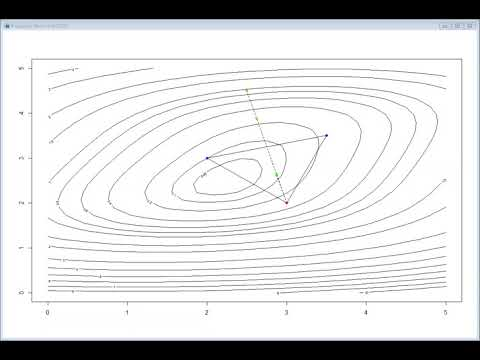

In [13]:
from IPython.display import Audio,Image, YouTubeVideo
id='j2gcuRVbwR0'
YouTubeVideo(id=id,width=600,height=300)


In [14]:
# Método de Nelder-Mead
from scipy.optimize import minimize

res = minimize(fun3, [0,0], method='Nelder-Mead')
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.225258318921084e-10
             x: [ 2.000e+00  5.000e+00]
           nit: 77
          nfev: 148
 final_simplex: (array([[ 2.000e+00,  5.000e+00],
                       [ 2.000e+00,  5.000e+00],
                       [ 2.000e+00,  5.000e+00]]), array([ 4.225e-10,  2.829e-09,  3.454e-09]))

In [15]:
# Método SLSQP - Sequential Least SQuares Programming
# para os problemas com restrições

import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]**2 + x[1]**2

def h1(x):    # na forma h1(x)>=0
    return x[0] - 5

def h2(x):    # na forma h2(x)>=0
    return x[0]*x[0] + x[1]*x[1] - 100

def g1(x):    # na forma g1(x)==0
    return x[0] - x[1]

# descrição dos constrangimentos 
con1 = {'type': 'ineq', 'fun': h1} 
con2 = {'type': 'ineq', 'fun': h2}
con3 = {'type': 'eq',  'fun': g1}

cons = [con1,con2,con3]
x0 = [10,10]

print('Initial Objective: ' + str(objective(x0)))
print('h1 = ', h1(x0))
print('h2 = ', h2(x0))
print('g1 = ', g1(x0))

# SLSQP - Sequential Least SQuares Programming

solution = minimize(objective, x0, method='SLSQP', constraints=cons)
x = solution.x

# Mostra o objectivo final
print('Final Objective: ' + str(objective(x)))
# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('h1 = ', h1(x))
print('h2 = ', h2(x))
print('g1 = ', g1(x))

Initial Objective: 200
h1 =  5
h2 =  100
g1 =  0
Final Objective: 99.99999999998629
Solution
x1 = 7.071067811864991
x2 = 7.071067811864991
h1 =  2.0710678118649906
h2 =  -1.3713474800169934e-11
g1 =  0.0


### Programação Linear

***Formulação do Problema***

$$\min \limits_{x}\mathbf{c}^{T}\mathbf{x}$$

sujeito aos constrangimentos 
$$\left\{
\begin{array}{l}
A_{ub}\mathbf{x\leq b}_{ub}\\
A_{eq}\mathbf{x = b}_{eq}\\
lb\leq \mathbf{x}\leq ub
\end{array}
\right.$$

`linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, 
    bounds=None, method='interior-point', options=None, x0=None)`

`method` - método utilizado (`simplex`, `revised simplex`, `interior-point`)

**Problema LP**

$z=-x_{1}+4x_{2}\rightarrow \min $

$-3x_{1}+x_{2}\leq 6$

$-x_{1}-2x_{2}\geq .4$

$x_{2}\geq -3$

In [16]:
# scipy.linprog
from scipy.optimize import linprog

#min f(x_1,x_2) = min  -x_1+4x_2

c = [-1, 4]   
A = [[-3, 1], [1, 2]]
b = [6, -4]
x1_bounds = (None, None)  #   -oo <= x1 < oo
x2_bounds = (-3, None)    #  -3 <= x2 < oo
bnds = [x1_bounds, x2_bounds]

res = linprog(c, A_ub=A, b_ub=b, bounds=bnds, method='simplex')
res

/tmp/ipykernel_7389/655125373.py:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, bounds=bnds, method='simplex')


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -14.0
       x: [ 2.000e+00 -3.000e+00]
     nit: 5

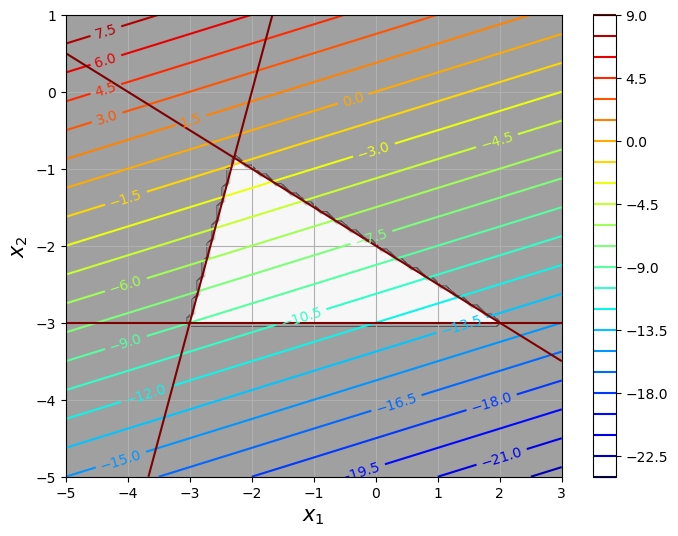

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Função objetivo:
def  f(x1, x2): return -x1 + 4*x2

# Restrições na forma h(x1,x2) <= 0:
def h1(x1, x2): return -3*x1 + x2 - 6
def h2(x1, x2): return 4 + x1 + 2*x2 
def h3(x1, x2): return -x2 - 3

LH = [h1,h2,h3]    # lista das restrições

def hh(x1, x2):
    for h in LH:
        if h(x1, x2) > 0: return 1  # restrição violada
    return  0  # nenhuma restrição violada
hhv = np.vectorize(hh)

xmin, xmax = -5, 3
ymin, ymax = -5, 1

xx = np.linspace(xmin, xmax, 100)
yy = np.linspace(ymin, ymax, 100)
X,Y = np.meshgrid(xx,yy)

fig = plt.figure(figsize=(8,6))
cs = plt.contour(X,Y, f(X,Y), 25, cmap='jet')
plt.colorbar(cs)
plt.clabel(cs, fontsize=10)

plt.contourf(X,Y, hhv(X,Y), cmap='binary',  alpha=0.4)

for h in LH: 
    plt.contour(X,Y, h(X,Y), [0], colors='maroon')
    
plt.xlabel(r"$x_1$", fontsize=15)
plt.ylabel(r"$x_2$", fontsize=15)
plt.grid()

#plt.savefig("LP.pdf")

plt.show()

**********************

## Integração Numérica

Calcular     $ \quad \displaystyle\int_{a}^{b}f(x)\ dx $   com um erro inferior a $\varepsilon$ dado.

**Regra do trapézio:** 

$h=b-a$

$I_{T}(h)=\frac{h}{2}\left( f(a)+f(b)\right) $;

![](https://sites.google.com/site/calcnum10/_/rsrc/1479154163523/home/lista-5/metodos/regra-dos-trapezios/Regra%20do%20Trapézio%20Img%201.jpg)

**Regra do trapézio composta:** 

$h = (b-a)/n, \qquad  x_{i}=a+i\times h, \qquad i=0,1,...,n$  

$ I_{T}(h)=\frac{h}{2}\times\left( \text{ }f(x_{0})+2f(x_{1})+2f(x_{2})+...+2f(x_{n-1})+f(x_{n})\right ) $ 

Regra de Runge: o erro de $I_{T}(h/2)$ estima-se como   $E_{T}(h/2)=1/3\times(I_{T}(h/2)-I_{T}(h))$
![](https://sites.google.com/site/calcnum10/_/rsrc/1479154156938/home/lista-5/metodos/regra-dos-trapezios/Regra%20do%20Trapézio%20Img%202.jpg)

**Regra de Simpson:** 

$h = (b-a)/2, \qquad  x_{0}=a, \qquad x_{1}=a+h, \qquad x_{2}=a+2h=b$  

$I_{S}(h)=\frac{h}{3}\times\left( f(x_{0})+4f(x_{1})+f(x_{2})\right) $

![](http://home.uevora.pt/~bushen/LabMat/A3-int_simpson.png)

**Regra de Simpson composta:** 

$h = (b-a)/n, \qquad  x_{i}=a+i\times h, \qquad i=0,1,...,n$  

$I_{S}(h)=\frac{h}{3}\times\left( \text{ }f(x_{0})+4f(x_{1})+2f(x_{2})+...+4 f(x_{n-1})+f(x_{n})\right) $

Regra de Runge:
o erro de $I_{S}(h/2)$ estima-se como  $E_{S}(h/2)=1/15\times(I_{S}(h/2)-I_{S}(h))$

![](http://home.uevora.pt/~bushen/LabMat/A3-int_simpson_comp.png)

Calcular:

$\int_{1}^{2}(x\sin x + \ln x)dx$  &nbsp;&nbsp; com um erro inferior a &nbsp;&nbsp; 0.0001

Resposta: 1.826717

In [18]:
# Regra do trapézio composta

import numpy as np
from math import sin, log

def fun(x):
    return x*sin(x)+log(x)


def trapezio(fun, a, b, n):
    """
    n - número dos subintervalos no intervalo [a,b]
    """
    # Regra do trapézio composta    
    h = (b-a)/n
    xx = list(np.linspace(a, b, num=n+1))
    sum = 0
    for i in range(1,n):
        sum = sum + fun(xx[i])        
    s = h/2 * (fun(xx[0]) + 2*sum+ fun(xx[n]) )
    return s
 
n = 2; res = trapezio(fun, 1.0, 2.0, n)
print ("n = {:2d}, I={:f}".format(n, res))                   
n = 4; res = trapezio(fun, 1.0, 2.0, n)
print ("n = {:2d}, I={:f}".format(n, res))
n = 8; res = trapezio(fun, 1.0, 2.0, n)
print ("n = {:2d}, I={:f}".format(n, res))
n = 16; res = trapezio(fun, 1.0, 2.0, n)
print ("n = {:2d}, I={:f}".format(n, res))
n = 32; res = trapezio(fun, 1.0, 2.0, n)
print ("n = {:2d}, I={:f}".format(n, res))

n =  2, I=1.789157
n =  4, I=1.817320
n =  8, I=1.824367
n = 16, I=1.826129
n = 32, I=1.826570


In [19]:
# Regra de Simpson composta

def fun(x):
    return x*sin(x)+log(x)

def simpson(fun, a, b, n):
    """
    n - número dos subintervalos
    """
    # Regra de Simson composta
    if n % 2 != 0:
        return None
    h = (b-a)/n
    xx = list(np.linspace(a, b, num=n+1))
    sumi = 0
    for i in range(1,n,2):
        sumi = sumi + fun(xx[i])        
    sump = 0
    for i in range(2,n-1,2):
        sump = sump + fun(xx[i])        
    s = h/3 * (fun(xx[0]) + 4*sumi + 2*sump + fun(xx[n]) )
    return s
 
n = 2; res = simpson(fun, 1.0, 2.0, n)
print ("n = {:2d}, Is = {:f}".format(n, res))                   
n = 4; res = simpson(fun, 1.0, 2.0, n)
print ("n = {:2d}, Is = {:f}".format(n, res))                   
n = 8; res = simpson(fun, 1.0, 2.0, n)
print ("n = {:2d}, Is = {:f}".format(n, res))                   

n =  2, Is = 1.826674
n =  4, Is = 1.826708
n =  8, Is = 1.826716


####  Dedução da fórmula da regra de Simpson para calcular numericamente  $\quad \int \limits_{-h}^{h}f(x)dx$

*Procedimento:*

- Considerar uma malha com 3 pontos $x_i\in [-h,h], i= 0,1,2$ equidistantes: $[-h, 0, h]$
- Considerar o polinómio quadrático interpolador de $f$ nos pontos $x_i$, $p(x)=ax^{2}+bx+c$ i.e. $p(-h)=F_0$, $p(0)=F_1$ e $p(h)=F_2$, onde $F_0=f(-h)=f(x_0)$, $F_1=f(0)=f(x_1)$, $F_2=f(h)=f(x_2)$.
- Resolver o sistema de 3 equações lineares com 3 incógnitas $a$, $b$ e $c$.
- substituir $a,b,c$ no polinómio $p(x)$. 
- Integrar o polinómio resultante no intervalo $[-h,h]$ e simplificar o resultado.

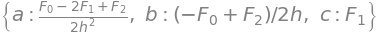

In [20]:
# Construção do sistema linear

from sympy import var, solve, integrate, simplify
var('a,b,c,x,F0,F1,F2,h')
p = a*x**2 + b*x + c
eq1 = p.subs(x,-h) - F0
eq2 = p.subs(x,0) - F1
eq3 = p.subs(x,h)- F2
res = solve([eq1, eq2, eq3], [a,b,c])
res

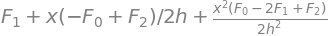

In [21]:
# definição de p(x) tendo em conta os valores de $a$, $b$ e $c$ obtidos anteriormente
ps = p.subs(res)
ps

In [22]:
# Claculo do integral usando a bultin function
res = integrate(ps, (x,-h,h))
res = simplify(res)
res

### scipy.integrate (Integração Numérica e resolução das Equações Diferenciais)

https://docs.scipy.org/doc/scipy/reference/integrate.html

In [23]:
from scipy import integrate

def fun1(x):
    return x**2

res = integrate.quad(fun1, 0, 4)
display(res)

print(4**3 / 3.)  # analytical result

21.333333333333332


In [24]:
def fun2(x):
    return np.exp(-x)

integrate.quad(fun2, 0, np.inf)

*********************************

## Interpolação

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

In [25]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10)
y = np.exp(-x/3.0)
p = interpolate.interp1d(x, y) #polinómio interpolador do tipo spline
p(5.)

array(0.1888756)

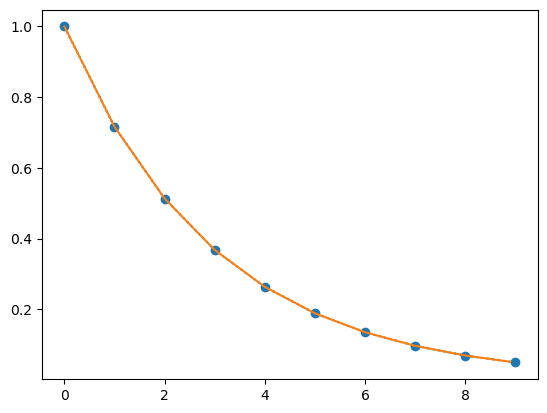

In [26]:
xnew = np.arange(0,9, 0.1)
ynew = p(xnew)   # usa o polinómio interpolador devolvido pela bultin-function `interp1d`
plt.plot(x, y, 'o:', xnew, ynew, '-')
plt.show()

In [27]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print (x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


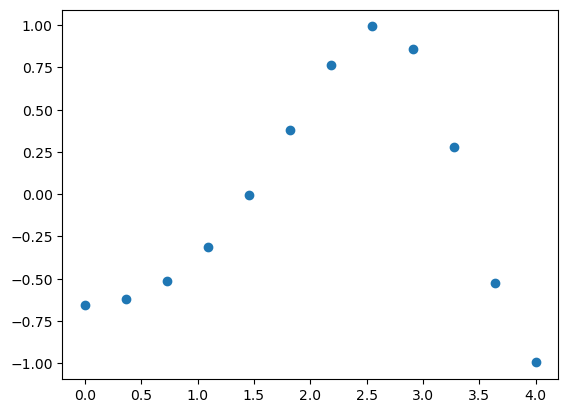

In [28]:
plt.plot(x, y, 'o')
plt.show()

In [29]:
f1 = interpolate.interp1d(x, y, kind='linear')
f2 = interpolate.interp1d(x, y, kind='quadratic')
f3 = interpolate.interp1d(x, y, kind='cubic')

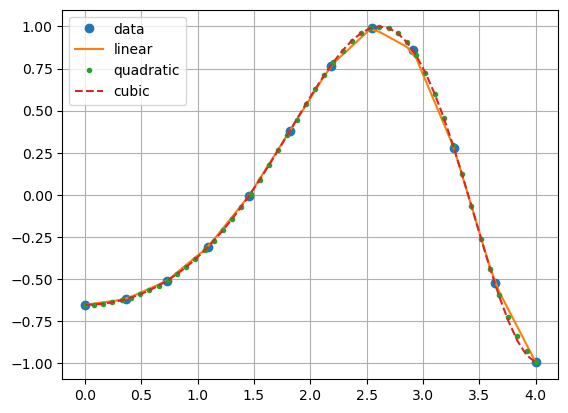

In [30]:
xnew = np.linspace(0, 4, 50)

plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f1(xnew), '-', label='linear')
plt.plot(xnew, f2(xnew), '.', label='quadratic')
plt.plot(xnew, f3(xnew), '--', label='cubic')


plt.legend()
plt.grid()
plt.show()

*************************

## Equações Diferenciais

$\displaystyle \frac{dy}{dt}=f(t,y)$

$y(t)$ -  função incógnita, $t \in \left[t_{0},T\right],\quad$  $y(t_{0}) = y_0$ - valor inicial 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-r0eMVs6rFeuFJyNZ2dOjmgNuJ0s5_sv5-ZwZxOlf6Wl7aRazxqIceAHuOqIL9HsMls8&usqp=CAU" width="350" height="250" />

Método de Euler:

$t=[t_{0},t_{1},t_{2},...,t_{n}],\quad$ $t_{k}=t_{0}+kh,\quad$  $t_{k+1}=t_{k}+h$

$\displaystyle \frac{y(t_{k+1})-y(t_{k})}{t_{k+1}-t_{k}}=f(t,y)$

$y(t_{k+1})=y(t_{k})+(t_{k+1}-t_{k})f(t_{k},y_{k})$

$y_{k+1}=y_{k}+hf(t_{k},y_{k})$

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvHps937QyXep2r_oiUjxK7ISBQla9-jiSqQ&usqp=CAU" width="350" height="250" />


***Exemplo***

Resolver

$y^{\prime }=-5ty,\quad$ $y(-1.5)=0.01,\quad$  $t\in \left[-1.5,1.5\right] $

(Sol:=$2.77272284523134e^{(\frac{-5t^2}{2})}$)


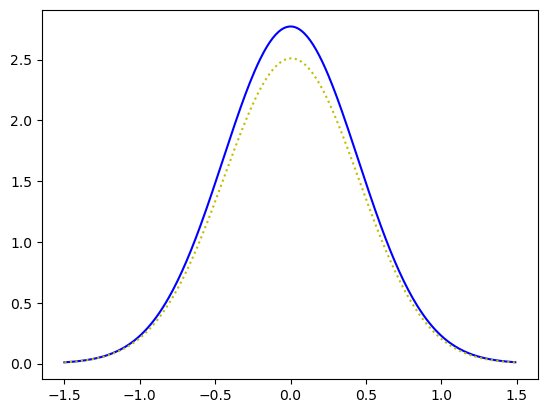

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def f(t,y):
    return -5*t*y

h = 0.01
t=np.arange(-1.5,1.5,h)

y=[0.01]
for i in range(len(t)-1):
    y.append(y[i]+h*f(t[i],y[i]))

plt.plot(t,2.77272284523134*np.exp(-5*(t**2)/2), '-b')
plt.plot(t, y,'y:')
plt.show()



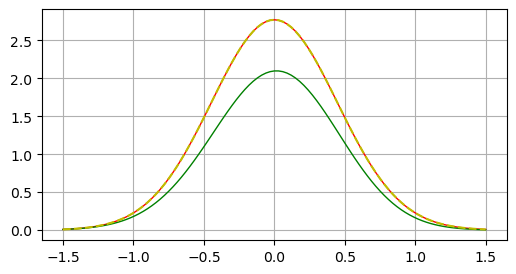

In [32]:
%matplotlib inline

import numpy as np
from   scipy.integrate import odeint
import matplotlib.pyplot as plt

def dydt(y, t):
    return -5*t*y

tt = np.linspace(-1.5, 1.5, 101)  # instantes de tempo 

y0 = 0.01   # valor inicial

y = odeint (dydt, y0, tt)  # resolução da equação
y = np.array(y).flatten() # reogranização para 1d array

dt = tt[1] - tt[0]
ye = np.zeros(len(tt))
ye[0] = y0;
for k in range (len(tt)-1):
    ye[k+1] = ye[k] + dt*dydt(ye[k], tt[k])

fig = plt.figure(figsize=(6,3))
plt.plot(tt, y, 'r', linewidth=1) # grafico
plt.plot(tt, ye,'g', linewidth=1) # grafico
plt.plot(tt,2.77272284523134*np.exp(-5*(tt**2)/2),'--y')
plt.grid(True)
plt.show()

#### ---------------------------------------------------------    
### Equações diferenciais de 2ª ordem

$\displaystyle \frac{d^2y}{dt^2}=f(t,y)$ $\quad \rightarrow \quad$
$\displaystyle y(t) = y_1(t),\quad$
$\displaystyle \frac{dy_1}{dt}=y_2(t),\quad$
$\displaystyle \frac{dy_2}{dt}=f(t,y_1)$

###### ================================================
**Modelação do movimento do planeta ao redor do Sol**

Vamos resolver o problema do movimento do planeta ao redor do Sol sob a influência da gravidade.

Este movimento por ser descrito como na forma do sistema ODE de segunda ordem

$ \displaystyle
x^{\prime \prime }=-\frac{kx}{(x^{2}+y^{2})^{\frac{3}{2}}},
\quad
y^{\prime \prime }=-\frac{kx}{(x^{2}+y^{2})^{\frac{3}{2}}}
$

onde $x(t)$ e $y(t)$ são as coordenadas do planeta.

Este sistema é equivalente ao sistema com 4 equações de primeira ordem.

Sejam $z_{1}=x,\space$  $z_{2}=x^{\prime},\space$ $z_{3}=y,\space$ $z_{4}=y^{\prime }$ . Então

$\left \{ 
\begin{array}{c}
z_{1}^{\prime }=z_{2} \\ 
z_{2}^{\prime }=-\dfrac{kz_{1}}{(z_{1}^{2}+z_{3}^{2})^{\frac{3}{2}}} \\ 
z_{3}^{\prime }=z_{4} \\ 
z_{4}^{\prime }=-\dfrac{kz_{3}}{(z_{1}^{2}+z_{3}^{2})^{\frac{3}{2}}}%
\end{array}%
\right. $

Para o problema modelo, escolhemos $k=1$ e definimos as condições iniciais

$z_{1}(0)=1,$ $z_{2}(0)=0,$ $z_{3}(0)=0,$  $z_{4}(0)=1.$


<IPython.core.display.Javascript object>


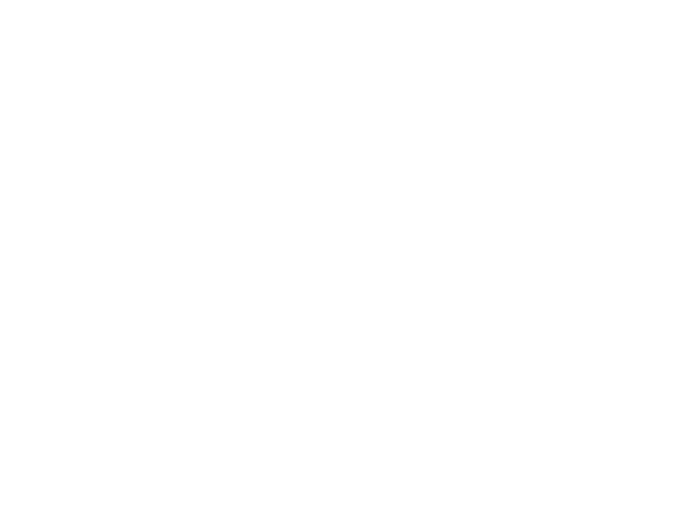

In [33]:
%matplotlib notebook
#%matplotlib qt

import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def f(z, t):
    z1, z2, z3, z4 = z
    return [z2,
            -z1/(z1**2 + z3**2)**(3/2),
            z4,
            -z3/(z1**2 + z3**2)**(3/2)]

t = np.linspace(0,20,1001)
z0 = [1, 0, 0, 0.4]
[z1,z2,z3,z4] = odeint(f, z0, t, full_output=False).T

fig,ax = plt.subplots()
ax.plot(z1, z3)

# círculo de raio 0.03 com centro (0,0):
circle = Circle((0,0), 0.03, facecolor='orange')

ax.add_patch(circle)
plt.axis('equal')
plt.grid(True)

# Animação
import matplotlib.animation as animation

ax = plt.axes(xlim=(-0.2, 1.2), ylim=(-0.4, 0.4))
line, = ax.plot([], [], lw=3)
circle = Circle((0, 0), 0.05, facecolor='orange')
ax.add_patch(circle)

pc = plt.Circle((z0[0], z0[2]), 0.02, fc='b')
ax.add_patch(pc)
ax.grid(True)

def redraw(i):
    x = z1[0:i+1]
    y = z3[0:i+1]
    line.set_data(x, y)
    pc.center=(x[-1],y[-1])

anim = animation.FuncAnimation(fig,redraw,frames=126, interval=50)
plt.show()

###### ================================================
**Movimento do corpo em campo gravitacional uniforme**


<img src="http://home.uevora.pt/~bushen/LabMat/pic553.png" title="Campo grav" width="350" height="250" />

`k` - coeficiente de resistência do ar

`alpha` - angulo de lançamento

`v0`   - velocidade inicial

$$x^{\prime \prime } = -k x^{\prime} \sqrt{(x^{\prime})^2+(y^{\prime})^2}$$

$$y^{\prime\prime} = -k y^{\prime} \sqrt{(x^{\prime})^2+(y^{\prime})^2} - g$$

Flight time = 0.9511 Distance = 2.6374 Height =1.0235 


<IPython.core.display.Javascript object>


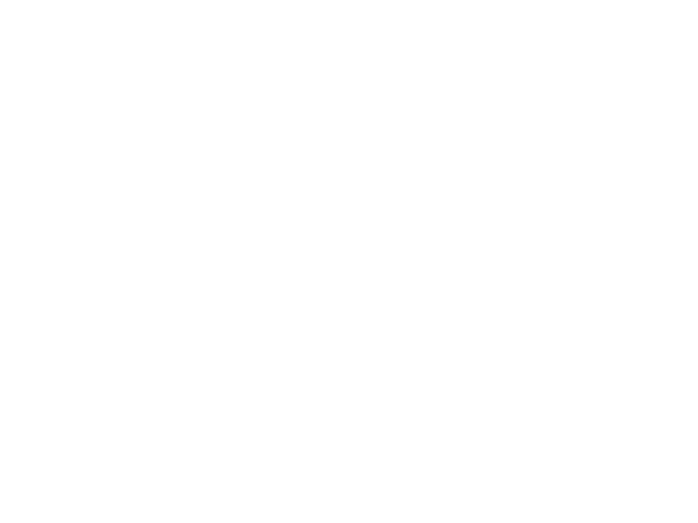

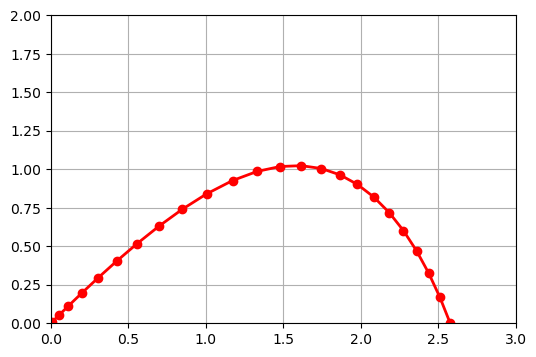

AttributeError: 'NoneType' object has no attribute 'remove_callback'

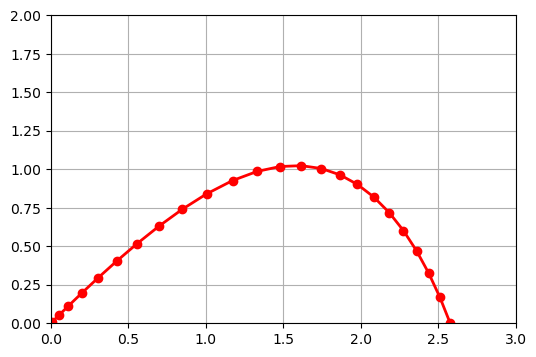

In [34]:
%matplotlib inline
from scipy.integrate import odeint, ode
ts = []
ys = []
FlightTime, Distance, Height =0,0,0
y4old = 0

def fout(t, y):
    global FlightTime, Distance, Height,y4old
    ts.append(t)
    ys.append(list(y.copy()))
    y1, y2, y3, y4 = y
    if y4 * y4old <= 0:   # atigido o ponto mais alto
        Height = y3
    if y4<0 and y3<=0.0:  # atigido o nível da terra
        FlightTime = t
        Distance = y1
        return -1
    y4old = y4

def f(t, y):    # lado direto do sistema das equações diferenciais
    k = 0.5     # coeficiente de resitência do ar
    g = 9.81    
    y1, y2, y3, y4 = y
    return [y2,
            -k*y2*np.sqrt(y2**2 + y4**2),
            y4,
            -k*y4*np.sqrt(y2**2 + y4**2) - g]  


tmax = 100        # tempo máximo do movimento
alph = np.pi/4    # angulo de lançamento do objeto 
v0 = 10.0         # velocidade inicial

ODE = ode(f)
y0,t0 = [0,
         v0*np.cos(alph),
         0,
         v0*np.sin(alph)], 0 # condições iniciais

r = ODE.set_integrator('dopri5', max_step=0.05)  
r.set_solout(fout)

r = ODE.set_initial_value(y0, t0)
ret = r.integrate(tmax)

print('Flight time = %.4f Distance = %.4f Height =%.4f '\
      % (FlightTime,Distance,Height))
Y = np.array(ys)
fig,ax = plt.subplots(figsize=(6,4))
ax.set_xlim((0,3))
ax.set_ylim((0,2))

ax.plot(Y[:,0],Y[:,2],'-or',linewidth=2)
ax.grid(True)
plt.show()


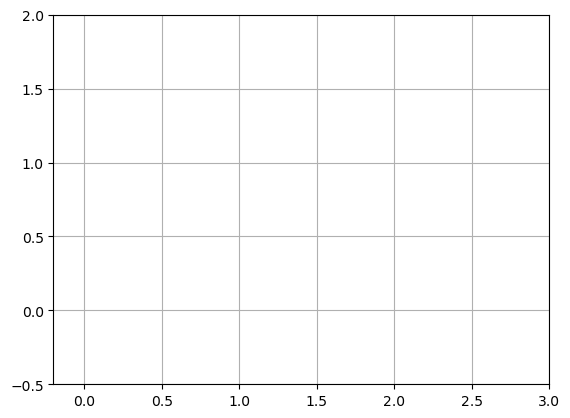

In [35]:
import matplotlib.animation as animation
from matplotlib.patches import Circle

x=Y[:,0]
y=Y[:,2]

fig=plt.figure()
plt.xlim(-0.2,3) 
plt.ylim(-0.5,2) 
plt.grid()

ax = plt.gca()           
line, = plt.plot([], [], lw=3)

def initpict():
    pc = plt.Circle((0,0), 0.03, fc='b')
    ax.add_patch(pc)
    
def redraw(i):
    line.set_data(x[:i], y[:i])
    

anim = animation.FuncAnimation(fig,redraw,init_func=initpict,frames=100, interval=50)
plt.show()

In [36]:
Y[:,0]

array([0.00000000e+00, 9.99999505e-07, 1.09999557e-05, 1.10995628e-04,
       1.11056369e-03, 1.10675937e-02, 5.12930060e-02, 1.14098119e-01,
       2.01174399e-01, 3.06086380e-01, 4.25794127e-01, 5.56868114e-01,
       6.97670017e-01, 8.47219450e-01, 1.00545113e+00, 1.17287582e+00,
       1.33262719e+00, 1.48006889e+00, 1.61728219e+00, 1.74564962e+00,
       1.86604333e+00, 1.97897611e+00, 2.08473167e+00, 2.18347268e+00,
       2.27532124e+00, 2.36041113e+00, 2.43891603e+00, 2.51105985e+00,
       2.57711530e+00, 2.63739585e+00])